# Exploratory Data Analysis

exploratory data analysis is understexploratoryanding datasets by summerizing their main characters oftrn plotting them visually, plotig consists of histograms, Box plot, scatter plot etc,. hence through EDA, we can define the probelem statement of our probelm.

we start by importing required libraries and the datasets, here we use the Car Features and MRSP.

In [2]:
!pip install kaggle

     ---------------------------------------- 0.0/82.1 kB ? eta -:--:--
     -------------- ------------------------- 30.7/82.1 kB ? eta -:--:--
     -------------- ------------------------- 30.7/82.1 kB ? eta -:--:--
     -------------- ------------------------- 30.7/82.1 kB ? eta -:--:--
     ---------------------------- --------- 61.4/82.1 kB 297.7 kB/s eta 0:00:01
     -------------------------------------  81.9/82.1 kB 416.7 kB/s eta 0:00:01
     -------------------------------------  81.9/82.1 kB 416.7 kB/s eta 0:00:01
     -------------------------------------  81.9/82.1 kB 416.7 kB/s eta 0:00:01
     -------------------------------------- 82.1/82.1 kB 208.9 kB/s eta 0:00:00
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
   ---------------------------------------- 0.0/78.2 kB ? eta -:--:--
   ------------------------------------ --- 71.7/78.2 kB ? eta -:--:--
   ------------------------------------ --- 71.7/78.2 kB ? eta -:-

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import kaggle
from kaggle.api.kaggle_api_extended import KaggleApi 

In [5]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_colwidth',None)

api=KaggleApi() 
api.authenticate() 

In [10]:
api.datasets_download_file('new-cars-price-2019','New_cars_price.csv')
sns.set(color_codes=True)
df=pd.read_csv('New_cars_price.csv')
df.head(5)

TypeError: KaggleApi.datasets_download_file() missing 1 required positional argument: 'file_name'

## checking the shape of datasets

In [2]:
df.shape

(11914, 16)

our dataset indicates that it has more than 10,000 samples(raws) and 16 features(columns)

here, we want to know if we have the strings as data and possibly convert it into integer and only then we can plot

## checking the types of the data

In [10]:
df.dtypes

Make                  object
Model                 object
Year                   int64
Engine Fuel Type      object
Engine HP            float64
Engine Cylinders     float64
Transmission Type     object
Driven_Wheels         object
Number of Doors      float64
Market Category       object
Vehicle Size          object
Vehicle Style         object
highway MPG            int64
city mpg               int64
Popularity             int64
MSRP                   int64
dtype: object

here all the data are into an integer format.

## Dropping irrelevant columns

In [33]:
df.head(10)

,Make,Model,Year,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,highway MPG,city mpg,MSRP
0,BMW,1 Series M,2011,335.0,6.0,MANUAL,rear wheel drive,26,19,46135
1,BMW,1 Series,2011,300.0,6.0,MANUAL,rear wheel drive,28,19,40650
2,BMW,1 Series,2011,300.0,6.0,MANUAL,rear wheel drive,28,20,36350
3,BMW,1 Series,2011,230.0,6.0,MANUAL,rear wheel drive,28,18,29450
4,BMW,1 Series,2011,230.0,6.0,MANUAL,rear wheel drive,28,18,34500
5,BMW,1 Series,2012,230.0,6.0,MANUAL,rear wheel drive,28,18,31200
6,BMW,1 Series,2012,300.0,6.0,MANUAL,rear wheel drive,26,17,44100
7,BMW,1 Series,2012,300.0,6.0,MANUAL,rear wheel drive,28,20,39300
8,BMW,1 Series,2012,230.0,6.0,MANUAL,rear wheel drive,28,18,36900
9,BMW,1 Series,2013,230.0,6.0,MANUAL,rear wheel drive,27,18,37200


In [34]:
df=df.drop(['Transmission Type'],axis=1)
df.head(5)

,Make,Model,Year,Engine HP,Engine Cylinders,Driven_Wheels,highway MPG,city mpg,MSRP
0,BMW,1 Series M,2011,335.0,6.0,rear wheel drive,26,19,46135
1,BMW,1 Series,2011,300.0,6.0,rear wheel drive,28,19,40650
2,BMW,1 Series,2011,300.0,6.0,rear wheel drive,28,20,36350
3,BMW,1 Series,2011,230.0,6.0,rear wheel drive,28,18,29450
4,BMW,1 Series,2011,230.0,6.0,rear wheel drive,28,18,34500


## Renaming Columns

In [38]:
df=df.rename(columns={'Engine HP':'HP','Engine Cylinders':'Cylinders','Driven_Wheels':'Drive Mode','highway MPG':'MPG-H','city mpg':'MPG-C'})
df.head(5)

,Make,Model,Year,HP,Cylinders,Drive Mode,MPG-H,MPG-C,MSRP
0,BMW,1 Series M,2011,335.0,6.0,rear wheel drive,26,19,46135
1,BMW,1 Series,2011,300.0,6.0,rear wheel drive,28,19,40650
2,BMW,1 Series,2011,300.0,6.0,rear wheel drive,28,20,36350
3,BMW,1 Series,2011,230.0,6.0,rear wheel drive,28,18,29450
4,BMW,1 Series,2011,230.0,6.0,rear wheel drive,28,18,34500


## dropping the duplicate rows

In [39]:
df.shape

(11914, 9)

In [42]:
duplicate_rows=df[df.duplicated()]
print('number of duplicated rows:', duplicate_rows.shape)

number of duplicated rows: (993, 9)


In [43]:
df.count() #to count the number of rows

Make          11914
Model         11914
Year          11914
HP            11845
Cylinders     11884
Drive Mode    11914
MPG-H         11914
MPG-C         11914
MSRP          11914
dtype: int64

### removing them

In [45]:
df=df.drop_duplicates()
df.head(10)

,Make,Model,Year,HP,Cylinders,Drive Mode,MPG-H,MPG-C,MSRP
0,BMW,1 Series M,2011,335.0,6.0,rear wheel drive,26,19,46135
1,BMW,1 Series,2011,300.0,6.0,rear wheel drive,28,19,40650
2,BMW,1 Series,2011,300.0,6.0,rear wheel drive,28,20,36350
3,BMW,1 Series,2011,230.0,6.0,rear wheel drive,28,18,29450
4,BMW,1 Series,2011,230.0,6.0,rear wheel drive,28,18,34500
5,BMW,1 Series,2012,230.0,6.0,rear wheel drive,28,18,31200
6,BMW,1 Series,2012,300.0,6.0,rear wheel drive,26,17,44100
7,BMW,1 Series,2012,300.0,6.0,rear wheel drive,28,20,39300
8,BMW,1 Series,2012,230.0,6.0,rear wheel drive,28,18,36900
9,BMW,1 Series,2013,230.0,6.0,rear wheel drive,27,18,37200


In [46]:
df.shape #to check

(10921, 9)

In [47]:
df.count()

Make          10921
Model         10921
Year          10921
HP            10852
Cylinders     10891
Drive Mode    10921
MPG-H         10921
MPG-C         10921
MSRP          10921
dtype: int64

we see that the 993 rows have been successfully removed and now we proceed to removing miaaing values in our dataset although there are still some that are duplicated but the biggest part have been removed and therefore won't greatly affect our model.

# Dropping missing values

it is important to signal that the missing values can be replaced by the mean or average value of a particular columns

In [48]:
print(df.isnull().sum())
df=df.dropna()
df.count()

Make           0
Model          0
Year           0
HP            69
Cylinders     30
Drive Mode     0
MPG-H          0
MPG-C          0
MSRP           0
dtype: int64


Make          10823
Model         10823
Year          10823
HP            10823
Cylinders     10823
Drive Mode    10823
MPG-H         10823
MPG-C         10823
MSRP          10823
dtype: int64

we see that the HP and Cylinders columns have some missing values and their number isn't that great and therefore i drop them and bingo, we have removed all the missing values.

# Detecting Outliers

outliers are responsible for a poor performance of a model and hence should be removed, they are points, we use the IQR score technique and use vizualization tool called Box plot, it shows outliers as points outside the box.

<AxesSubplot:xlabel='HP'>

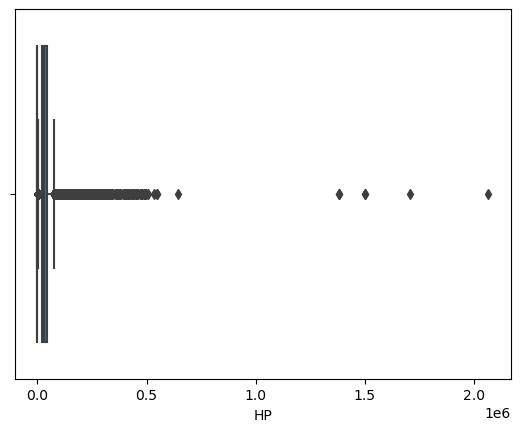

In [51]:
sns.boxplot(x=df['HP'])

<AxesSubplot:xlabel='MSRP'>

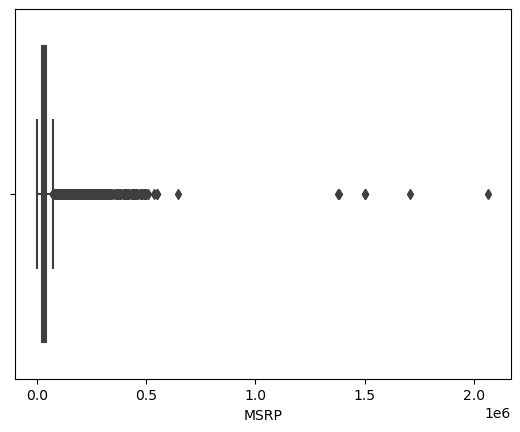

In [52]:
sns.boxplot(x=df['MSRP'])

<AxesSubplot:xlabel='Cylinders'>

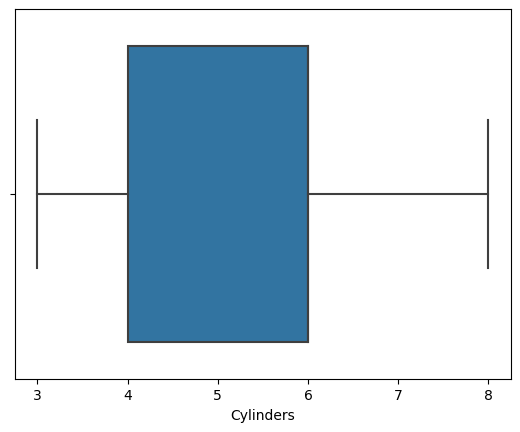

In [70]:
sns.boxplot(x=df['Cylinders'])

all the points outside the boxes are outliers and thus should be removed.

In [56]:
Q1=df.quantile(0.25)
Q3=df.quantile(0.75)
IQR=Q3-Q1
print(IQR)

Year             9.0
HP             130.0
Cylinders        2.0
MPG-H            8.0
MPG-C            6.0
MSRP         21322.5
dtype: float64


the above are the numbers of outliers per feature, the next step, we remove them.

In [67]:
df=df[~((df<(Q1-1.5*IQR))|(df>(Q3+1.5*IQR))).any(axis=1.0)]
df.shape

C:\Users\HP\AppData\Local\Temp\ipykernel_2588\1436567684.py:1: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version. Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  df=df[~((df<(Q1-1.5*IQR))|(df>(Q3+1.5*IQR))).any(axis=1.0)]


(10823, 9)

# plot different features against another

## 1. HISTOGRAMS

histograms are simply the frequency of occurence of variables in an interval, here we have 10 types of cars and we would want to know which has a big number of cars, hence the histograms will help us determine which comapny has a great number of car.

Text(0.5, 0, 'make')

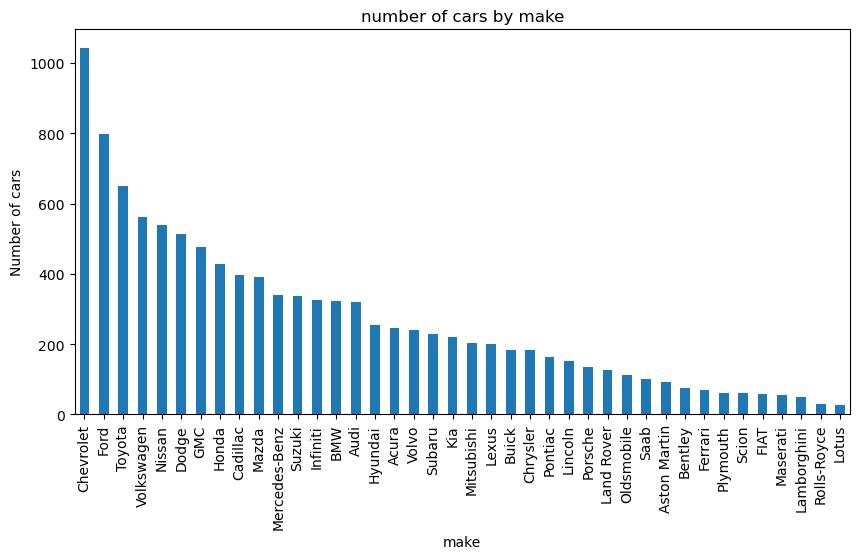

In [80]:
df.Make.value_counts().nlargest(40).plot(kind='bar',figsize=(10,5))
plt.title('number of cars by make')
plt.ylabel('Number of cars')
plt.xlabel('make')

# 2. HEATMAP

the heatmap shows the correlation between two all the features in plot i.e, the correlation of the dependent variables.

,Year,HP,Cylinders,MPG-H,MPG-C,MSRP
Year,1.000000,0.285224,-0.098384,0.344489,0.292685,0.583572
HP,0.285224,1.000000,0.732378,-0.456481,-0.550915,0.732267
Cylinders,-0.098384,0.732378,1.000000,-0.710154,-0.763835,0.336847
MPG-H,0.344489,-0.456481,-0.710154,1.000000,0.942032,-0.072146
MPG-C,0.292685,-0.550915,-0.763835,0.942032,1.000000,-0.141995
MSRP,0.583572,0.732267,0.336847,-0.072146,-0.141995,1.000000


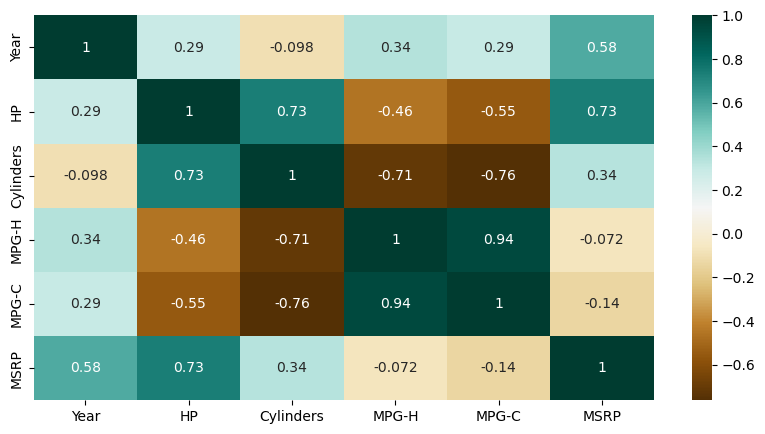

In [82]:
plt.figure(figsize=(10,5))
c=df.corr()
sns.heatmap(c, cmap='BrBG', annot=True)
c

this heatmap shows us: the Price'MSRP' depends on greately on the HP'horsepower' of the car and has a strong relationship with the year that it was made, i.e, with time the price deterioartes.
we see the mile per gallon/highway aka MPG-H correlates much with the Mile per MPG-C mile per gallon in the city, the fact the they both calculates the speed of a particular model in the data.
the Cylinders correlates much with the HP, this is in light with the size of the cylinder of a particular model of car which influences the horsepower of a car.
we also see that the year has a negative effect on the performance/condition of the cylinders but has a poistive influence on the speed of the car as of MPG-H.

# Scatter plot

used to find correlations between two varibales

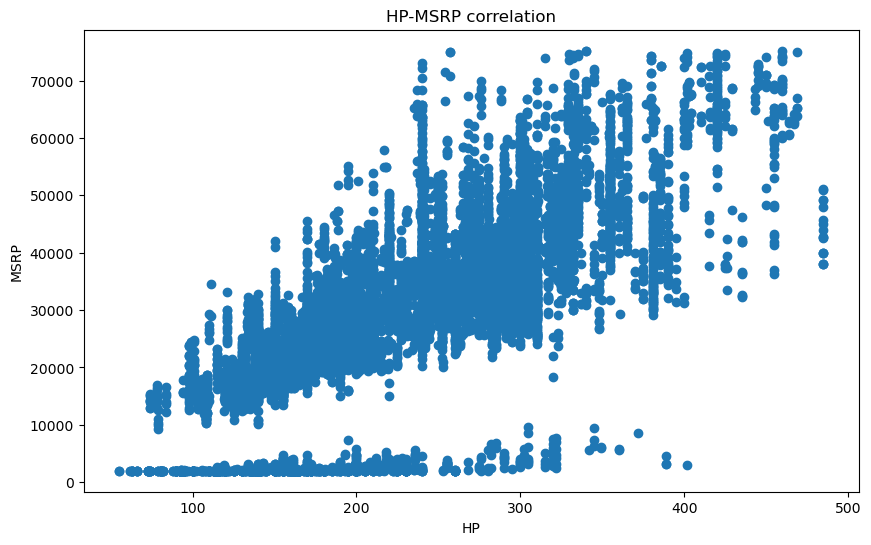

In [86]:
fig,ax=plt.subplots(figsize=(10,6))
plt.title('HP-MSRP correlation')
ax.scatter(df['HP'], df['MSRP'])
ax.set_xlabel('HP')
ax.set_ylabel('MSRP')
plt.show()

# Replacing the values in a row

In [87]:
df

,Make,Model,Year,HP,Cylinders,Drive Mode,MPG-H,MPG-C,MSRP
0,BMW,1 Series M,2011.0,335.0,6.0,rear wheel drive,26.0,19.0,46135.0
1,BMW,1 Series,2011.0,300.0,6.0,rear wheel drive,28.0,19.0,40650.0
2,BMW,1 Series,2011.0,300.0,6.0,rear wheel drive,28.0,20.0,36350.0
3,BMW,1 Series,2011.0,230.0,6.0,rear wheel drive,28.0,18.0,29450.0
4,BMW,1 Series,2011.0,230.0,6.0,rear wheel drive,28.0,18.0,34500.0
...,...,...,...,...,...,...,...,...,...
11909,Acura,ZDX,2012.0,300.0,6.0,all wheel drive,23.0,16.0,46120.0
11910,Acura,ZDX,2012.0,300.0,6.0,all wheel drive,23.0,16.0,56670.0
11911,Acura,ZDX,2012.0,300.0,6.0,all wheel drive,23.0,16.0,50620.0
11912,Acura,ZDX,2013.0,300.0,6.0,all wheel drive,23.0,16.0,50920.0


In [92]:
replace_values={1:'rear wheel drive', 1:'front wheel drive'}
df=df.replace({"Drive Mode":replace_values})
df

,Make,Model,Year,HP,Cylinders,Drive Mode,MPG-H,MPG-C,MSRP
0,BMW,1 Series M,2011.0,335.0,6.0,rear wheel drive,26.0,19.0,46135.0
1,BMW,1 Series,2011.0,300.0,6.0,rear wheel drive,28.0,19.0,40650.0
2,BMW,1 Series,2011.0,300.0,6.0,rear wheel drive,28.0,20.0,36350.0
3,BMW,1 Series,2011.0,230.0,6.0,rear wheel drive,28.0,18.0,29450.0
4,BMW,1 Series,2011.0,230.0,6.0,rear wheel drive,28.0,18.0,34500.0
...,...,...,...,...,...,...,...,...,...
11909,Acura,ZDX,2012.0,300.0,6.0,all wheel drive,23.0,16.0,46120.0
11910,Acura,ZDX,2012.0,300.0,6.0,all wheel drive,23.0,16.0,56670.0
11911,Acura,ZDX,2012.0,300.0,6.0,all wheel drive,23.0,16.0,50620.0
11912,Acura,ZDX,2013.0,300.0,6.0,all wheel drive,23.0,16.0,50920.0


# Thanks
 # Mwamba Efrayim